# Assignment 03 - Jacob McIntosh

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jandrewm12/5530/refs/heads/main/Assignment03/data_raw/diabetes_raw.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Obtain Random Sample

In [60]:
# seed for reproducibility
seed = 17
sample_df = df.sample(n=25, random_state=seed)
sample_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
649,0,107,60,25,0,26.4,0.133,23,0
516,9,145,88,34,165,30.3,0.771,53,1
151,4,114,65,0,0,21.9,0.432,37,0
381,0,105,68,22,0,20.0,0.236,22,0
325,1,157,72,21,168,25.6,0.123,24,0


# Glucose Statistics - Sample vs. Population

<Axes: >

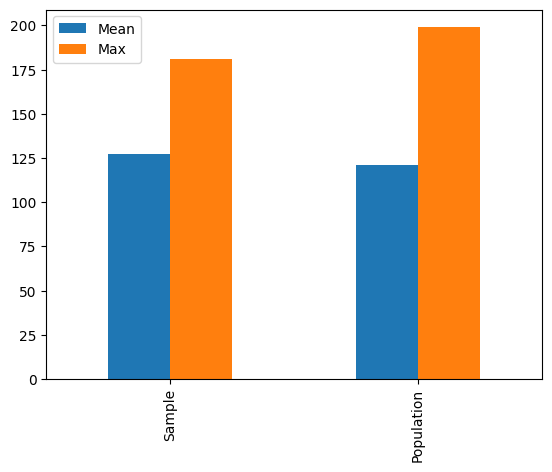

In [61]:
sample_gluc_mean = sample_df['Glucose'].mean()
sample_gluc_max = sample_df['Glucose'].max()

population_gluc_mean = df['Glucose'].mean()
population_gluc_max = df['Glucose'].max()

index = ['Sample', 'Population']
mean = [sample_gluc_mean, population_gluc_mean]
max = [sample_gluc_max, population_gluc_max]

df1 = pd.DataFrame({'Mean': mean, 'Max': max}, index=index)
df1.plot.bar()


# BMI Statistics - Sample vs. Population

<Axes: >

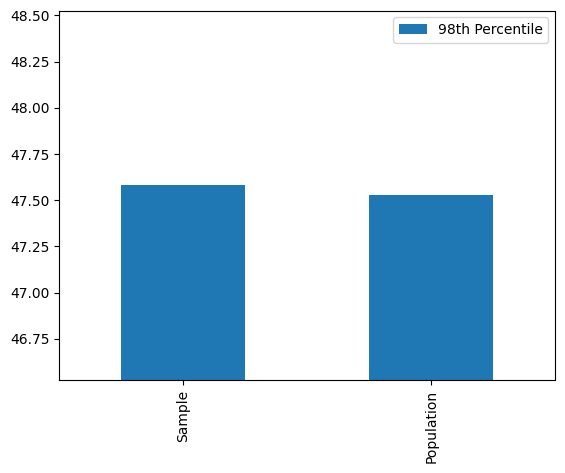

In [62]:
bmi_sample_quartile = sample_df['BMI'].quantile(q=0.98)
bmi_population_quartile = df['BMI'].quantile(q=0.98)

index = ['Sample', 'Population']
quartile = [bmi_sample_quartile, bmi_population_quartile]
df2 = pd.DataFrame({'98th Percentile': quartile}, index=index)
df2.plot.bar(ylim=(bmi_population_quartile - 1, bmi_population_quartile + 1))

# Bootstrapping - Blood Pressure Statistics

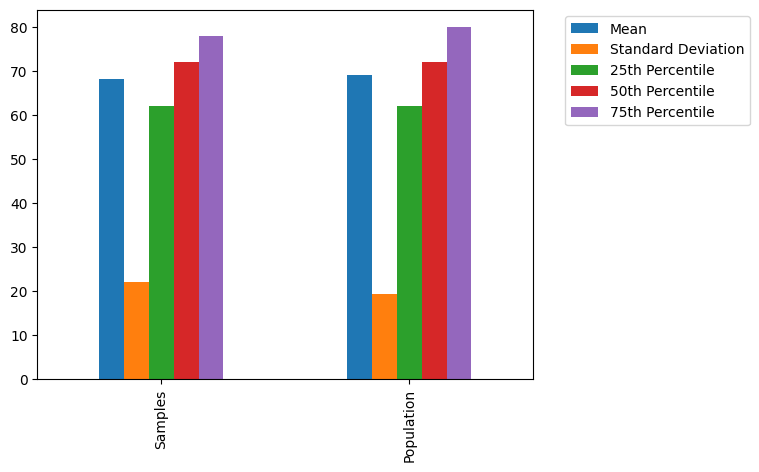

In [63]:
blood_pressure_samples = []
bp_means = []
bp_stds = []
bp_25q = []
bp_50q = []
bp_75q = []

for i in range (500):
    bp_sample = df['BloodPressure'].sample(n=150, replace=True, random_state=seed)
    blood_pressure_samples.append(bp_sample)
    bp_means.append(bp_sample.mean())
    bp_stds.append(bp_sample.std())
    bp_25q.append(bp_sample.quantile(q=0.25))
    bp_50q.append(bp_sample.quantile(q=0.5))
    bp_75q.append(bp_sample.quantile(q=0.75))


bp_sample_mean = np.mean(bp_means)
bp_sample_std = np.mean(bp_stds)
bp_sample_25q = np.mean(bp_25q)
bp_sample_50q = np.mean(bp_50q)
bp_sample_75q = np.mean(bp_75q)

bp_pop_mean = df['BloodPressure'].mean()
bp_pop_std = df['BloodPressure'].std()
bp_pop_25q = df['BloodPressure'].quantile(q=0.25)
bp_pop_50q = df['BloodPressure'].quantile(q=0.5)
bp_pop_75q = df['BloodPressure'].quantile(q=0.75)

index = ['Samples', 'Population']

mean = [bp_sample_mean, bp_pop_mean]
standard_d = [bp_sample_std, bp_pop_std]
quartile_25 = [bp_sample_25q, bp_pop_25q]
quartile_50 = [bp_sample_50q, bp_pop_50q]
quartile_75 = [bp_sample_75q, bp_pop_75q]

df3 = pd.DataFrame({'Mean': mean, 'Standard Deviation': standard_d, '25th Percentile': quartile_25, '50th Percentile': quartile_50, '75th Percentile': quartile_75}, index=index)
df3.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


The chart above illustrates how affective bootstrapping can be. After generating random samples from the population, we get very close approximations to what the actual statistics of the population are.